In [2]:
#Importing Pyhton librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
#Reading the Data
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

## Analyzing the data

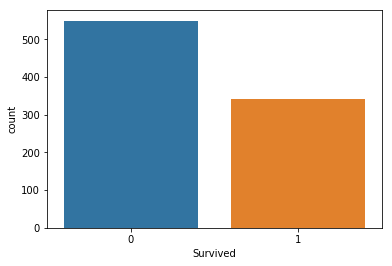

In [6]:
sns.countplot(x='Survived',data=data)

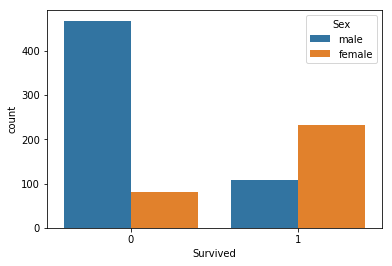

In [7]:
#Check based on gender
sns.countplot(x='Survived',hue='Sex',data=data)

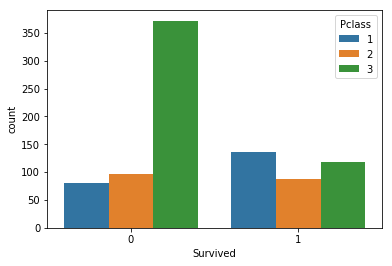

In [8]:
#Based on passenger class
sns.countplot(x='Survived',hue='Pclass',data=data)

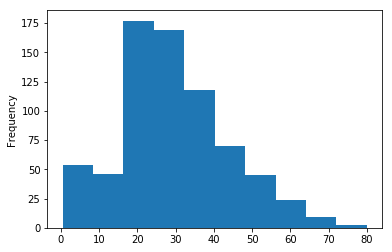

In [9]:
data['Age'].plot.hist()

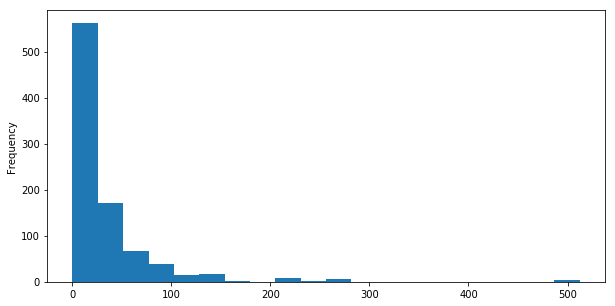

In [11]:
data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [16]:
##Create more visualization plots to discover the relationship

In [17]:
#Information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Wrangling
clean the data by removing the Nan values and unnecessary columns

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

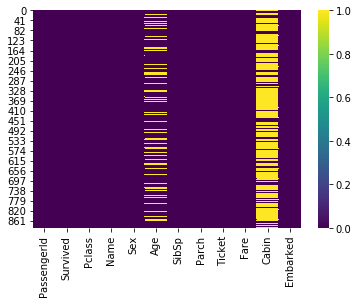

In [24]:
sns.heatmap(data.isnull(),cmap = "viridis")

In [31]:
#Since you can see we have multiple null values in Cain column, we will be dropping the column
data.drop("Cabin", axis=1, inplace=True)

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
data.dropna(inplace=True)

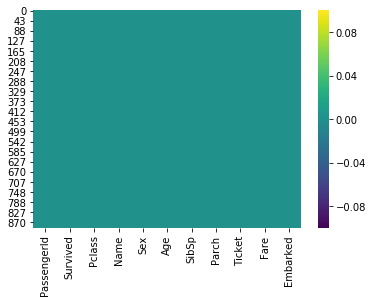

In [35]:
#To check everything got placed correctly as we did
sns.heatmap(data.isnull(),cmap = "viridis")

In [37]:
# Now as we can see from the data, we have many strig variables
# We need to convert those into categorical variables

In [41]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [42]:
Embark = pd.get_dummies(data['Embarked'],drop_first=True)
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [43]:
Pcl = pd.get_dummies(data['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [45]:
#Concatenating above with data
data = pd.concat([data,sex,Embark,Pcl],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,male,Q,S,2,3,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,1,1,0,1,0,1


In [50]:
data.drop(['Sex','PassengerId','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'PassengerId' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [52]:
#After removing the unwanted columns
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1


In [54]:
data.drop('Pclass',axis=1,inplace=True)

In [58]:
data = data.drop(data.columns[[12,13,14]],axis=1)

IndexError: index 12 is out of bounds for axis 0 with size 9

In [59]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,male,Q
0,0,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0
